<a href="https://colab.research.google.com/github/alonzojp/AI-Chess-Bot/blob/main/%5BAICB%5D_csv_to_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

!pip install chess
import chess
import pandas as pd
from IPython.display import clear_output
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv('drive/My Drive/from_json.csv', index_col = 0)

In [3]:
print(len(df))
df = df.dropna()
print(len(df))

21158950
21158950


In [4]:
df[:21158950 // 2].describe()

,evaluation_value
count,1.057948e+07
mean,1.311632e+02
std,1.312180e+03
min,-2.000000e+04
25%,-2.000000e+01
50%,1.100000e+01
75%,8.500000e+01
max,2.000000e+04


In [5]:
# 10579474	6k1/5p2/5rp1/4p3/3pP2P/1p1P2PK/3Q4/8	cp	600
df = df[:21158950 // 5]
df

,fen_notation,pv_type,evaluation_value
0,rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR,cp,20
1,rnbqk1nr/pp2p1bp/3p2p1/2pP1p2/2P5/2N2N2/PP2PPP...,cp,64
2,2Rb2k1/3q1rpp/p3Q3/2N1p3/4P3/3Pp3/1P4PP/1K6,cp,0
3,rnbqkb1r/ppp1pppp/5n2/3p4/3P1B2/8/PPP1PPPP/RN1...,cp,0
4,2b1k3/pr5R/1p2pr2/5p2/2pP4/2P5/PP3PB1/R5K1,cp,994
...,...,...,...
4231785,1r6/5P2/8/3k4/8/8/5RK1/8,cp,0
4231786,5r2/5P2/8/3k4/8/8/5RK1/8,cp,0
4231787,2r2rk1/pp2q1b1/2b3pp/2p1pp2/4P2P/2P1B1P1/P4PB1...,cp,-143
4231788,rnbqkb1r/pp1ppp1p/5np1/2p5/4P3/2N3P1/PPPPNP1P/...,cp,0


In [6]:
# print(df.sort_values('evaluation_value'))
# print(df)
# board = chess.Board('rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR')
# display(board)

In [7]:
df.loc[df['pv_type'] == 'mate']

,fen_notation,pv_type,evaluation_value
40,8/5ppp/8/5PPP/8/k7/8/K7,mate,19
54,8/8/6k1/pp6/3p1KP1/P2P4/2P5/8,mate,-22
96,2b1kr2/p6r/1pB1pQ2/5p2/2pP4/2P5/PP3P2/R5K1,mate,26
147,8/p7/8/8/2K5/5k2/2P5/8,mate,22
148,8/p7/8/8/3K4/5k2/2P5/8,mate,21
...,...,...,...
4231695,8/8/8/8/5r2/8/4K1k1/5R2,mate,-17
4231723,1k6/2R5/p2Pb3/N7/1P5p/p2q3P/K5P1/8,mate,-5
4231737,8/8/8/5ppp/8/6PP/4kP2/6K1,mate,-24
4231739,8/8/8/5ppp/8/6PP/4kPK1/8,mate,-22


In [8]:
temp = df.values
rescaled_evaluations = []
for i in range(0, len(temp)):
  if(temp[i][1] == 'mate'):
    if(temp[i][2] > 0):
      temp[i][2] = (80 - temp[i][2] + 20) * 1000
      rescaled_evaluations.append(temp[i][2])
    else:
      temp[i][2] = (temp[i][2] - 20) * 1000
      rescaled_evaluations.append(temp[i][2])
  else:
      rescaled_evaluations.append(temp[i][2])
# for i in range(0, 100):
#   print(temp[i])
del temp

In [9]:
df['evaluation_value'] = rescaled_evaluations
df['evaluation_value'].describe()

count    4.231790e+06
mean     8.674495e+03
std      2.726689e+04
min     -9.300000e+04
25%     -1.300000e+01
50%      3.300000e+01
75%      1.370000e+02
max      9.900000e+04
Name: evaluation_value, dtype: float64

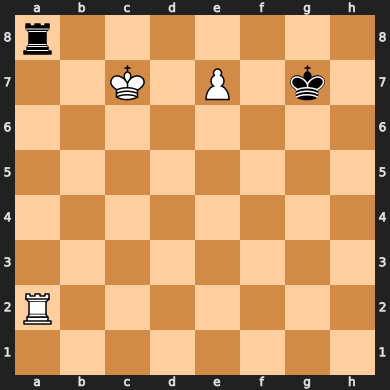

In [10]:
display(chess.Board('r7/2K1P1k1/8/8/8/8/R7/8'))

In [11]:
df

,fen_notation,pv_type,evaluation_value
0,rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR,cp,20
1,rnbqk1nr/pp2p1bp/3p2p1/2pP1p2/2P5/2N2N2/PP2PPP...,cp,64
2,2Rb2k1/3q1rpp/p3Q3/2N1p3/4P3/3Pp3/1P4PP/1K6,cp,0
3,rnbqkb1r/ppp1pppp/5n2/3p4/3P1B2/8/PPP1PPPP/RN1...,cp,0
4,2b1k3/pr5R/1p2pr2/5p2/2pP4/2P5/PP3PB1/R5K1,cp,994
...,...,...,...
4231785,1r6/5P2/8/3k4/8/8/5RK1/8,cp,0
4231786,5r2/5P2/8/3k4/8/8/5RK1/8,cp,0
4231787,2r2rk1/pp2q1b1/2b3pp/2p1pp2/4P2P/2P1B1P1/P4PB1...,cp,-143
4231788,rnbqkb1r/pp1ppp1p/5np1/2p5/4P3/2N3P1/PPPPNP1P/...,cp,0


In [12]:
piece_to_number_array = ['zero', 'p', 'two', 'b', 'n', 'r', 'six', 'seven', 'q', 'k']

def piece_to_number(piece): # lower = black upper = white
  if(piece.islower()): # black piece = negative
    return -1 * piece_to_number_array.index(piece.lower())
  else:
    return piece_to_number_array.index(piece.lower())

def fen_to_array(fen):
  final_array = []

  fen_split = fen.split('/')
  for row in fen_split:
    for column in row:
      if(column.isdigit()):
        for i in range(0, int(column)):
          final_array.append(0)
      else:
        final_array.append(int(piece_to_number(column)))
  return final_array

len(fen_to_array('7r/pbrkq3/2p5/5p2/2pP1P2/2P4P/1P6/8'))

64

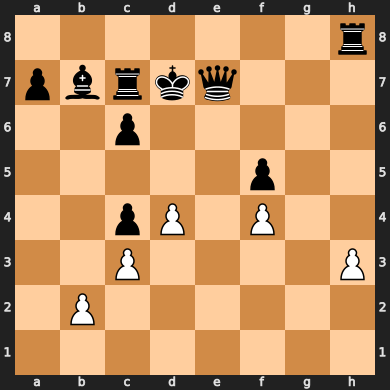

In [13]:
board = chess.Board('7r/pbrkq3/2p5/5p2/2pP1P2/2P4P/1P6/8')
display(board)

In [14]:
alpha = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
def ordered_notation():
  final = []
  counter = 8
  row_number = 8
  for i in range(0, 64):
    final.append(str(alpha[i % 8]) + str(row_number))
    counter -= 1
    if(counter == 0):
      counter = 8
      row_number -= 1
  return final

In [15]:
numeric_representations = []
for row in df['fen_notation']:
  numeric_representations.append(fen_to_array(row))
print(len(numeric_representations))

4231790


In [16]:
numeric_representations[10]

[-5,
 0,
 -3,
 -8,
 -9,
 0,
 0,
 -5,
 -1,
 -1,
 0,
 0,
 -3,
 -1,
 -1,
 -1,
 0,
 0,
 -4,
 -1,
 -1,
 -4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 4,
 1,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 8,
 0,
 1,
 1,
 1,
 5,
 0,
 0,
 0,
 9,
 3,
 0,
 5]

In [17]:
pieces_df = pd.DataFrame(numeric_representations, columns=ordered_notation())

In [ ]:
del numeric_representations

In [ ]:
e_vals = df['evaluation_value'].value
del df

In [18]:
pieces_df['evaluation_value'] = e_vals

In [19]:
pieces_df

,a8,b8,c8,d8,e8,f8,g8,h8,a7,b7,...,h2,a1,b1,c1,d1,e1,f1,g1,h1,evaluation_value
0,-5,-4,-3,-8,-9,-3,-4,-5,-1,-1,...,1,5,4,3,8,9,3,4,5,20
1,-5,-4,-3,-8,-9,0,-4,-5,-1,-1,...,1,5,0,3,8,9,3,0,5,64
2,0,0,5,-3,0,0,-9,0,0,0,...,1,0,9,0,0,0,0,0,0,0
3,-5,-4,-3,-8,-9,-3,0,-5,-1,-1,...,1,5,4,0,8,9,3,4,5,0
4,0,0,-3,0,-9,0,0,0,-1,-5,...,0,5,0,0,0,0,0,9,0,994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231785,0,-5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4231786,0,0,0,0,0,-5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4231787,0,0,-5,0,0,-5,-9,0,-1,-1,...,0,5,0,0,8,0,5,9,0,-143
4231788,-5,-4,-3,-8,-9,-3,0,-5,-1,-1,...,1,5,0,3,8,9,3,0,5,0


In [20]:
pieces_df.to_csv('from_csv_2-5.csv')

In [21]:
import pyarrow.feather as feather
feather.write_feather(pieces_df, 'feathercsv')

KeyboardInterrupt: 

In [ ]:
# board = chess.Board('rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR')
# display(board)

In [ ]:
pieces_df.describe()